# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [1]:
!pip install matplotlib-venn

In [2]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive)

In [3]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 124561 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.3_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.3) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.3) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.5 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31631 sha256=61a1196350bcb357e7a69028faa2cb854350f7ca8a237f289ef88ab5ea472b9f
  Stored in directory: /root/.cache/pip/wheels/32/98/bd/4893d6923dd027f455b250367d402bfd69a6f4416581df46db
Successfully built libarchive


# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [4]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

ERROR: Operation cancelled by user


# Install [cartopy](http://scitools.org.uk/cartopy/docs/latest/)

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv(
    "crimess.csv"
)



<ipython-input-6-b41cac04a0a8>:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(


In [157]:
data=data.dropna()

carac=['Date','Primary Type','X Coordinate','Y Coordinate','Latitude','Longitude','Year']
data=data[carac]




In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data['heur'] = data['Date'].dt.hour
data['jour'] = data['Date'].dt.dayofweek
data['Mois'] = data['Date'].dt.month

In [9]:
data.isnull().sum()



,0
Date,0
Primary Type,0
X Coordinate,0
Y Coordinate,0
Latitude,0
Longitude,0
Year,0
heur,0
jour,0
Mois,0


In [10]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['Primary Type'] = label.fit_transform(data['Primary Type'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5559665 entries, 11 to 6238480
Data columns (total 10 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Date          datetime64[ns]
 1   Primary Type  int64         
 2   X Coordinate  float64       
 3   Y Coordinate  float64       
 4   Latitude      float64       
 5   Longitude     object        
 6   Year          int64         
 7   heur          int32         
 8   jour          int32         
 9   Mois          int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(2), object(1)
memory usage: 403.0+ MB


<Axes: xlabel='Date'>

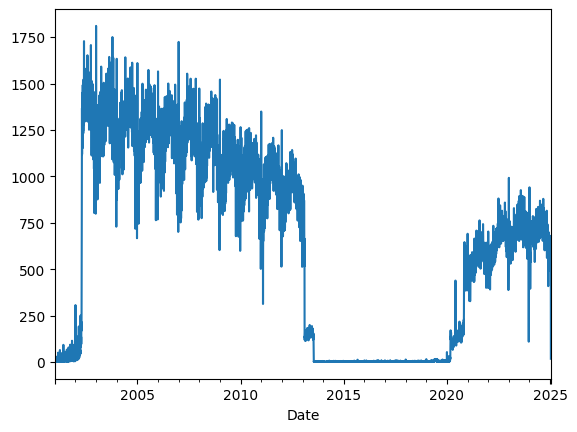

In [158]:
monthly_crimes = data.groupby(data['Date'].dt.to_period('D')).size()
monthly_crimes.plot()

In [155]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data['Date'] = pd.to_datetime(data['Date'])
monthly_crimes = data.groupby(data['Date'].dt.to_period('D')).size()


monthly_crimes_df = monthly_crimes.reset_index(name='nombre_crime')
monthly_crimes_df['Date'] = monthly_crimes_df['Date'].dt.to_timestamp()


scaler = MinMaxScaler()
monthly_crimes_df['nombre_crime'] = scaler.fit_transform(monthly_crimes_df[['nombre_crime']])


In [95]:
monthly_crimes_df

,Date,crime_count
0,2001-01-01,0.150912
1,2001-01-02,0.004975
2,2001-01-03,0.001658
3,2001-01-05,0.002764
4,2001-01-06,0.002764
...,...,...
8495,2025-01-09,0.307352
8496,2025-01-10,0.289663
8497,2025-01-11,0.317855
8498,2025-01-12,0.285793


from matplotlib import pyplot as plt
monthly_crimes_df['crime_count'].plot(kind='hist', bins=20, title='crime_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['crime_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = monthly_crimes_df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('crime_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = monthly_crimes_df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['crime_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = monthly_crimes_df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('crime_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = monthly_crimes_df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
monthly_crimes_df['crime_count'].plot(kind='line', figsize=(8, 4), title='crime_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [154]:

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)


sequence_length = 120


crime_counts = monthly_crimes_df['nombre_crime'].values
X, y = create_sequences(crime_counts, sequence_length)


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print(f"1 {X_train[1][119]}")
y_train[0]

1 0.0038695411829740185


0.0038695411829740185

In [134]:
from keras.layers import Dropout

model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    LSTM(25, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [135]:
model.compile(optimizer='adam', loss='mean_squared_error')

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


history = model.fit(X_train, y_train, epochs=20, batch_size=62, validation_data=(X_test, y_test), verbose=1)



Epoch 1/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 33s 130ms/step - loss: 0.0685 - val_loss: 0.0013
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 27s 129ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 34s 163ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 34s 129ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 47s 158ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 36s 133ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 40s 130ms/step - loss: 0.0022 - val_loss: 9.9766e-04
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 41s 129ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 9/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 49s 168ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 10/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 33s 130ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 11/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 42s 135ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 12/20
210

53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step


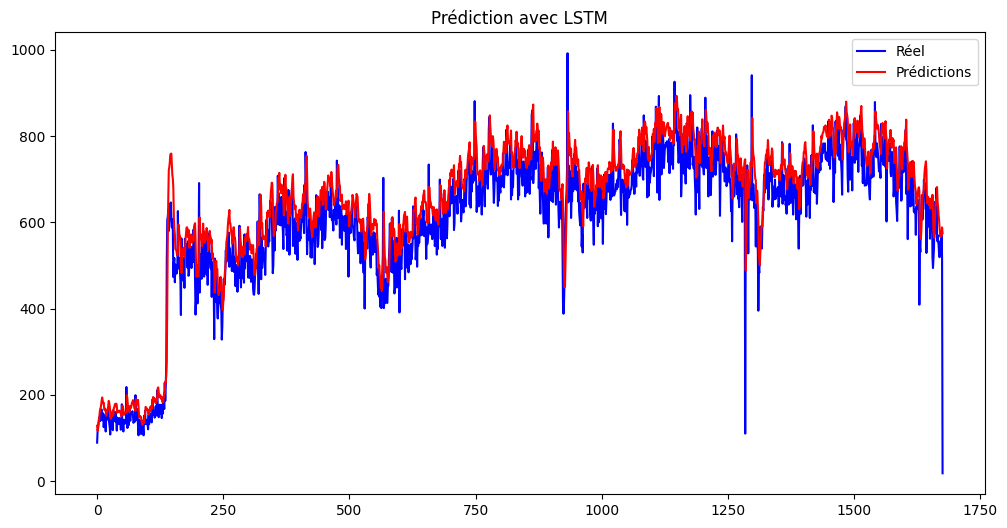

In [136]:

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Réel', color='blue')
plt.plot(predictions, label='Prédictions', color='red')
plt.legend()
plt.title("Prédiction avec LSTM")
plt.show()


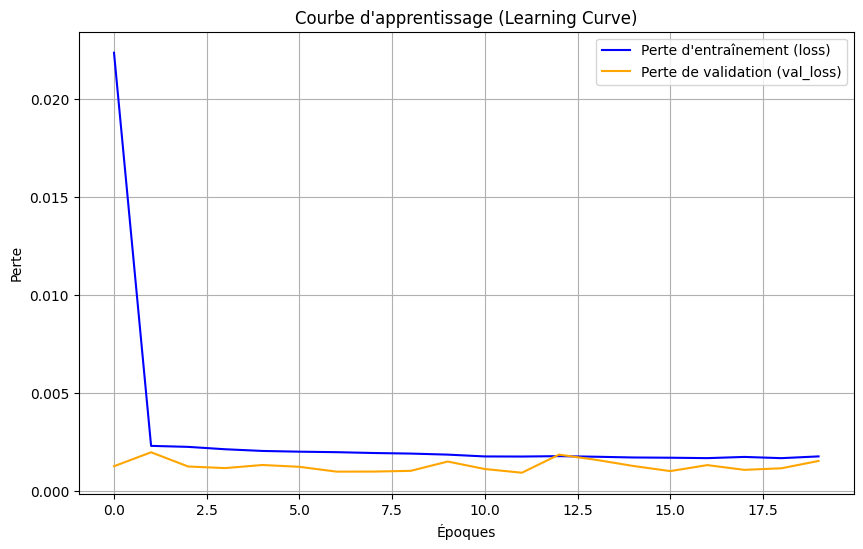

In [137]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Perte d\'entraînement (loss)', color='blue')
plt.plot(history.history['val_loss'], label='Perte de validation (val_loss)', color='orange')
plt.title('Courbe d\'apprentissage (Learning Curve)')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.grid(True)
plt.show()


In [138]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_actual, predictions)
print(f"R² : {r2:.2f}")


R² : 0.82


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


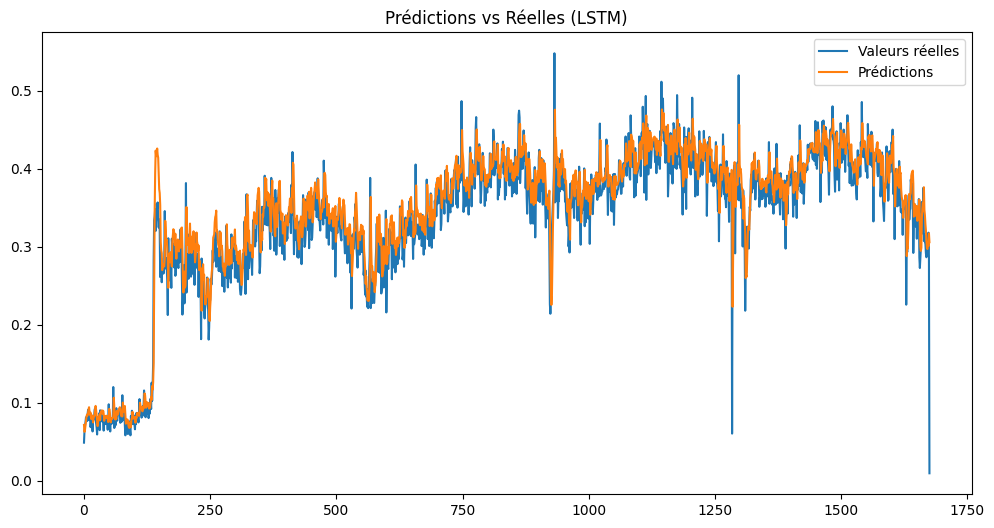

In [132]:

import matplotlib.pyplot as plt


predictions = model.predict(X_test)


plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Valeurs réelles")
plt.plot(predictions, label="Prédictions")
plt.legend()
plt.title("Prédictions vs Réelles)")
plt.show()


In [156]:


last_sequence = monthly_crimes_df['nombre_crime'].values[-sequence_length:]


last_sequence = last_sequence.reshape((1, sequence_length, 1))


predicted_value = model.predict(last_sequence)


predicted_value_rescaled = scaler.inverse_transform(predicted_value.reshape(-1, 1))

print(f"Prédiction du nombre de morts pour demain : {predicted_value_rescaled[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prédiction du nombre de morts pour demain : 348.8173828125
